Columns in the dataset: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'IsMainRoad', 'price']
Mean Squared Error: 0.3236632352981579
Mean Absolute Error: 0.4122886523694411
R-squared Score: 0.6763367647018419


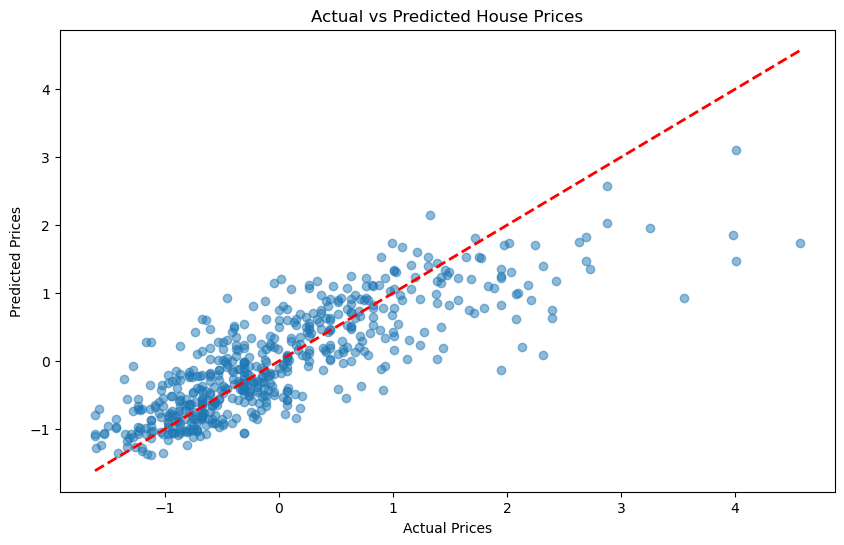

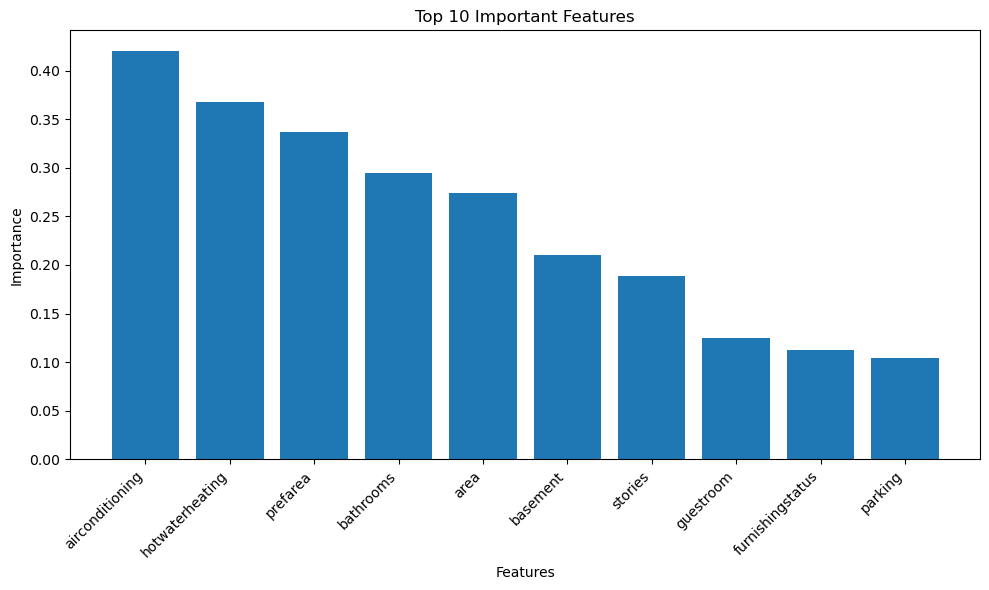

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Load final dataset
df = pd.read_csv('final_house_prices.csv')

# Print column names to identify the target variable
print(f"Columns in the dataset: {df.columns.tolist()}")

# Load the model
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Assuming 'price' is the target variable based on the previous output
X = df.drop('price', axis=1)
y = df['price']

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")

# Save the plot in the current working directory
plt.savefig('actual_vs_predicted.png')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Top 10 Important Features")
plt.tight_layout()

# Save the plot in the current working directory
plt.savefig('feature_importance.png')
plt.show()
